<a href="https://colab.research.google.com/github/ConorDawson/Conor_Dawson_T00226371_Search_Tree/blob/main/Hex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a rough work notebook for the search tree algorithm assignement of the Hex game. None of these versions work the working version can be found here : https://colab.research.google.com/drive/1WUZzvPpz98O3DGrQDZxWDUKo0kS9F1z_?usp=sharing

In [ ]:
import numpy as np

class HexBoard:
    def __init__(self, size=6, board=None):
        self.size = size
        self.board = board if board is not None else np.full((size, size), " ")

    def display(self):
        for i, row in enumerate(self.board):
            print(" " * i + " ".join(row))

    def is_valid_move(self, x, y):
        return 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == " "

    def make_move(self, x, y, player):
        if self.is_valid_move(x, y):
            new_board = HexBoard(self.size, self.board.copy())
            new_board.board[x, y] = player
            return new_board
        return None

    def check_win(self, player):
        visited = set()
        if player == "X":
            for i in range(self.size):
                if self.board[i, 0] == "X" and self.dfs(i, 0, "X", visited):
                    return True
        else:
            for i in range(self.size):
                if self.board[0, i] == "O" and self.dfs(0, i, "O", visited):
                    return True
        return False

    def dfs(self, x, y, player, visited):
        if (player == "X" and y == self.size - 1) or (player == "O" and x == self.size - 1):
            return True

        visited.add((x, y))
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, -1), (-1, 1)]

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if (nx, ny) not in visited and 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx, ny] == player:
                if self.dfs(nx, ny, player, visited):
                    return True
        return False

    def get_possible_moves(self, player):
        return [self.make_move(i, j, player) for i in range(self.size) for j in range(self.size) if self.is_valid_move(i, j)]

In [ ]:
HexBoard().board

array([[' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' ']], dtype='<U1')

In [ ]:
HexBoard().display()

In [ ]:
class SearchTreeNode:
    def __init__(self, board, playing_as, ply=1):
        self.children = []
        self.value_is_assigned = False
        self.ply_depth = ply
        self.current_board = board
        self.move_for = playing_as

        if board.check_win("X"):
            self.value = 1 if playing_as == "X" else -1
        elif board.check_win("O"):
            self.value = 1 if playing_as == "O" else -1
        elif not board.get_possible_moves(playing_as):
            self.value = 0
        else:
            self.generate_children()

    def min_max_value(self):
        if hasattr(self, 'value'):
            return self.value

        values = [child.min_max_value() for child in self.children]
        self.value = max(values) if self.ply_depth % 2 == 0 else min(values)
        return self.value

    def generate_children(self):
        for new_board in self.current_board.get_possible_moves(self.move_for):
            self.children.append(SearchTreeNode(new_board, "O" if self.move_for == "X" else "X", self.ply_depth + 1))

In [ ]:

def play_Hex():
    board = HexBoard()
    player = input("Do you want to play as X or O? (X goes left-right, O goes top-bottom): ")
    computer = "O" if player == "X" else "X"
    players_turn = player == "X"

    while True:
        board.display()
        if board.check_win(player):
            print("You win!")
            break
        elif board.check_win(computer):
            print("Computer wins!")
            break
        elif not board.get_possible_moves(player):
            print("It's a draw!")
            break

        if players_turn:
            move = input("Enter move as 'row col': ").split()
            x, y = int(move[0]), int(move[1])
            if board.is_valid_move(x, y):
                board = board.make_move(x, y, player)
            else:
                print("Invalid move, try again.")
                continue
        else:
            search_tree = SearchTreeNode(board, computer)
            search_tree.min_max_value()
            board = search_tree.children[-1].current_board

        players_turn = not players_turn

play_Hex()


Do you want to play as X or O? (X goes left-right, O goes top-bottom): X
           
            
             
              
               
                
Enter move as 'row col': 0 1
  X        
            
             
              
               
                


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

class HexGame:
    def __init__(self, size=6):
        self.size = size
        self.board = [['.' for _ in range(size)] for _ in range(size)]
        self.current_player = 'R'  # Red starts

    def draw_board(self):
        fig, ax = plt.subplots(figsize=(self.size/2, self.size/2))
        ax.set_aspect('equal')
        dx = np.sqrt(3)
        dy = 1.5
        x_coords = []
        y_coords = []
        colors = []

        for row in range(self.size):
            for col in range(self.size):
                x = col * dx + (row * dx / 2)
                y = -row * dy
                x_coords.append(x)
                y_coords.append(y)
                colors.append(self.get_color(self.board[row][col]))

        ax.scatter(x_coords, y_coords, s=500, marker='h', edgecolors='black', c=colors)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)
        plt.show()

    def get_color(self, cell):
        if cell == 'R':
            return 'red'
        elif cell == 'B':
            return 'blue'
        return 'white'

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def make_move(self, row, col):
        if self.is_valid_move(row, col):
            self.board[row][col] = self.current_player
            self.current_player = 'B' if self.current_player == 'R' else 'R'
            return True
        return False

    def get_possible_moves(self):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.board[r][c] == '.']

    def minimax(self, depth, maximizing):
        if depth == 0 or self.check_win('R') or self.check_win('B'):
            return self.evaluate(), None

        best_move = None
        if maximizing:
            max_eval = float('-inf')
            for move in self.get_possible_moves():
                new_board = copy.deepcopy(self)
                new_board.make_move(*move)
                eval_score, _ = new_board.minimax(depth - 1, False)
                if eval_score > max_eval:
                    max_eval = eval_score
                    best_move = move
            return max_eval, best_move
        else:
            min_eval = float('inf')
            for move in self.get_possible_moves():
                new_board = copy.deepcopy(self)
                new_board.make_move(*move)
                eval_score, _ = new_board.minimax(depth - 1, True)
                if eval_score < min_eval:
                    min_eval = eval_score
                    best_move = move
            return min_eval, best_move

    def evaluate(self):
        return random.randint(-10, 10)

    def ai_move(self):
        _, best_move = self.minimax(2, True)
        if best_move:
            self.make_move(*best_move)

    def check_win(self, player):
        visited = set()
        def dfs(r, c):
            if (r, c) in visited:
                return False
            if player == 'R' and r == self.size - 1:
                return True
            if player == 'B' and c == self.size - 1:
                return True
            visited.add((r, c))
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player:
                    if dfs(nr, nc):
                        return True
            return False

        for i in range(self.size):
            if player == 'R' and self.board[0][i] == 'R' and dfs(0, i):
                return True
            if player == 'B' and self.board[i][0] == 'B' and dfs(i, 0):
                return True
        return False
    @staticmethod
    def play_game():
          game = HexGame(size=6)
          while True:
              game.draw_board()
              row, col = map(int, input("Enter row and col (e.g., 0 1): ").split())
              if not game.make_move(row, col):
                  print("Invalid move! Try again.")
                  continue

              if game.check_win('R'):
                  game.draw_board()
                  print("Red wins!")
                  break

              print("AI is thinking...")
              game.ai_move()

              if game.check_win('B'):
                  game.draw_board()
                  print("Blue wins!")
                  break
              elif not game.get_possible_moves():
                  game.draw_board()
                  print("It's a draw!")
                  break
          return game



In [ ]:
hexGame = HexGame()
hexGame.get_possible_moves()



[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5)]

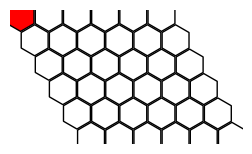

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5)]

In [ ]:
hexGame.make_move(0, 0)
hexGame.draw_board()
hexGame.get_possible_moves()


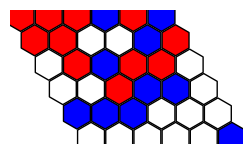

In [ ]:
hexGame.ai_move()
hexGame.draw_board()

In [ ]:
hexGame.make_move(5, 0)

True

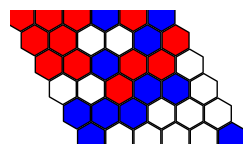

In [ ]:
hexGame.ai_move()
hexGame.draw_board()

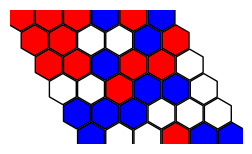

In [ ]:
hexGame.make_move(5, 4)
hexGame.ai_move()
hexGame.draw_board()

In [ ]:
hexGame.check_win('R')

False

In [ ]:
hexGame.play_game()

NameError: name 'hexGame' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

class HexGame:
    def __init__(self, size=6):
        self.size = size
        self.board = [['.' for _ in range(size)] for _ in range(size)]
        self.current_player = 'R'  # Red starts
        self.state = self.determine_state()

    def draw_board(self):
        fig, ax = plt.subplots(figsize=(self.size/2, self.size/2))
        ax.set_aspect('equal')
        dx = np.sqrt(3)
        dy = 1.5
        x_coords = []
        y_coords = []
        colors = []

        for row in range(self.size):
            for col in range(self.size):
                x = col * dx + (row * dx / 2)
                y = -row * dy
                x_coords.append(x)
                y_coords.append(y)
                colors.append(self.get_color(self.board[row][col]))

        ax.scatter(x_coords, y_coords, s=500, marker='h', edgecolors='black', c=colors)
        ax.set_xticks([])  # Hide x-axis
        ax.set_yticks([])  # Hide y-axis
        ax.set_frame_on(False)
        plt.show()

    def get_color(self, cell):
        return 'red' if cell == 'R' else 'blue' if cell == 'B' else 'white'

    def switch_turn(self, player):
        return 'B' if player == 'R' else 'R'

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def make_move(self, row, col):
        if self.is_valid_move(row, col):
            self.board[row][col] = self.current_player
            self.current_player = self.switch_turn(self.current_player)
            self.state = self.determine_state()
            return True
        return False

    def determine_state(self):
        if self.check_win('R'):
            return 'R'
        elif self.check_win('B'):
            return 'B'
        elif not self.get_possible_moves():
            return 'D'
        return 'U'

    def get_possible_moves(self):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.board[r][c] == '.']

    def evaluate(self):
        return random.randint(-10, 10)  # Placeholder evaluation function

    def minimax(self, depth, maximizing, alpha=float('-inf'), beta=float('inf')):
        if depth == 0 or self.state in ['R', 'B', 'D']:
            return self.evaluate(), None

        best_move = None
        if maximizing:
            max_eval = float('-inf')
            for move in self.get_possible_moves():
                new_board = copy.deepcopy(self)
                new_board.make_move(*move)
                eval_score, _ = new_board.minimax(depth - 1, False, alpha, beta)
                if eval_score > max_eval:
                    max_eval = eval_score
                    best_move = move
                alpha = max(alpha, eval_score)
                if beta <= alpha:
                    break  # Beta cutoff
            return max_eval, best_move
        else:
            min_eval = float('inf')
            for move in self.get_possible_moves():
                new_board = copy.deepcopy(self)
                new_board.make_move(*move)
                eval_score, _ = new_board.minimax(depth - 1, True, alpha, beta)
                if eval_score < min_eval:
                    min_eval = eval_score
                    best_move = move
                beta = min(beta, eval_score)
                if beta <= alpha:
                    break  # Alpha cutoff
            return min_eval, best_move

    def ai_move(self):
        _, best_move = self.minimax(2, True)
        if best_move:
            self.make_move(*best_move)

    def check_win(self, player):
        visited = set()
        def dfs(r, c):
            if (r, c) in visited:
                return False
            if player == 'R' and r == self.size - 1:
                return True
            if player == 'B' and c == self.size - 1:
                return True
            visited.add((r, c))
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player:
                    if dfs(nr, nc):
                        return True
            return False

        for i in range(self.size):
            if player == 'R' and self.board[0][i] == 'R' and dfs(0, i):
                return True
            if player == 'B' and self.board[i][0] == 'B' and dfs(i, 0):
                return True
        return False

In [ ]:
class SearchTree:
    def __init__(self, game_instance, player, depth=0):
        self.children = []
        self.value_assigned = False
        self.depth = depth
        self.current_state = game_instance
        self.player_turn = player

        if self.current_state.state == 'U':
            self.generate_children()
        else:
            self.assign_value()

    def assign_value(self):
        if self.current_state.state == 'D':
            self.value = 0
        else:
            self.value = 1 if (self.depth % 2) == 0 else -1
        self.value_assigned = True

    def min_max_value(self):
        if self.value_assigned:
            return self.value

        self.children = sorted(self.children, key=lambda x: x.min_max_value())
        self.value = self.children[-1].value if (self.depth % 2) == 0 else self.children[0].value
        self.value_assigned = True
        return self.value

    def generate_children(self):
        """Generates children and prints debug info."""
        possible_moves = self.current_state.get_possible_moves()

        if not possible_moves:
            print("No possible moves from this state.")
            return

        print(f"Generating {len(possible_moves)} children for player {self.player_turn} at depth {self.depth}")

        for next_move in possible_moves:
            new_state = copy.deepcopy(self.current_state)
            new_state.make_move(*next_move)
            child_tree = SearchTree(new_state, new_state.switch_turn(self.player_turn), depth=self.depth + 1)
            self.children.append(child_tree)

        print(f"Generated {len(self.children)} children at depth {self.depth}")

    def print_children(self):
        """Prints all child board states from the current state."""
        if not self.children:
            print("No children generated for this state.")
            return

        for i, child in enumerate(self.children):
            print(f"Child {i + 1}:")
            for row in child.current_state.board:
                print(" ".join(row))
            print("-" * 20)  # Separator between child states

In [ ]:
def main_game_loop():
    game = HexGame(size=6)
    while True:
        game.draw_board()
        row, col = map(int, input("Enter row and col (e.g., 0 1): ").split())
        if not game.make_move(row, col):
            print("Invalid move! Try again.")
            continue

        if game.state == 'R':
            game.draw_board()
            print("Red wins!")
            break

        print("AI is thinking...")
        game.ai_move()

        if game.state == 'B':
            game.draw_board()
            print("Blue wins!")
            break
        elif game.state == 'D':
            game.draw_board()
            print("It's a draw!")
            break

In [ ]:
game = HexGame(size=6)  # Creates a Hex game with board size 6x6


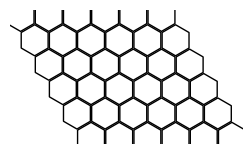

In [ ]:
game.draw_board()


In [ ]:
game.make_move(2, 3)  # Example move at row 2, column 3


True

In [ ]:
if game.is_valid_move(1, 4):
    game.make_move(1, 4)


In [ ]:
possible_moves = game.get_possible_moves()
print(possible_moves)


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 5), (2, 0), (2, 1), (2, 2), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


In [ ]:
game.ai_move()


In [ ]:
if game.check_win('R'):
    print("Red wins!")
elif game.check_win('B'):
    print("Blue wins!")


In [ ]:
game = HexGame(size=6)  # Create a new game instance
search_tree = SearchTree(game, game.current_player)  # Create search tree
search_tree.print_children()  # Print the children of the initial state


Streaming output truncated to the last 5000 lines.
Generated 2 children at depth 34
Generating 2 children for player R at depth 34
Generating 1 children for player B at depth 35
Generated 1 children at depth 35
Generated 2 children at depth 34
Generating 2 children for player R at depth 34
Generated 2 children at depth 34
Generated 3 children at depth 33
Generated 4 children at depth 32
Generating 4 children for player R at depth 32
Generating 3 children for player B at depth 33
Generating 2 children for player R at depth 34
Generated 2 children at depth 34
Generating 2 children for player R at depth 34
Generated 2 children at depth 34
Generating 2 children for player R at depth 34
Generated 2 children at depth 34
Generated 3 children at depth 33
Generated 4 children at depth 32
Generating 4 children for player R at depth 32
Generating 3 children for player B at depth 33
Generating 2 children for player R at depth 34
Generated 2 children at depth 34
Generating 2 children for player R a

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

class HexGame:
    def __init__(self, size=6):
        self.size = size
        self.board = [['.' for _ in range(size)] for _ in range(size)]
        self.current_player = 'R'
        self.state = self.determine_state()

    def draw_board(self):
        fig, ax = plt.subplots(figsize=(self.size/2, self.size/2))
        ax.set_aspect('equal')
        dx = np.sqrt(3)
        dy = 1.5
        x_coords = []
        y_coords = []
        colors = []

        for row in range(self.size):
            for col in range(self.size):
                x = col * dx + (row * dx / 2)
                y = -row * dy
                x_coords.append(x)
                y_coords.append(y)
                colors.append(self.get_color(self.board[row][col]))

        ax.scatter(x_coords, y_coords, s=500, marker='h', edgecolors='black', c=colors)
        ax.set_xticks([])  # Hide x-axis
        ax.set_yticks([])  # Hide y-axis
        ax.set_frame_on(False)
        plt.show()

    def get_color(self, cell):
        return 'red' if cell == 'R' else 'blue' if cell == 'B' else 'white'

    def switch_turn(self):
        self.current_player = 'B' if self.current_player == 'R' else 'R'

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def make_move(self, row, col):
        if self.is_valid_move(row, col):
            self.board[row][col] = self.current_player
            self.switch_turn()
            self.state = self.determine_state()
            return True
        return False

    def determine_state(self):
        if self.check_win('R'):
            return 'R'
        elif self.check_win('B'):
            return 'B'
        elif not self.get_possible_moves():
            return 'D'
        return 'U'

    def get_possible_moves(self):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.board[r][c] == '.']

    def check_win(self, player):
        visited = set()
        def dfs(r, c):
            if (r, c) in visited:
                return False
            if player == 'R' and r == self.size - 1:
                return True
            if player == 'B' and c == self.size - 1:
                return True
            visited.add((r, c))
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player:
                    if dfs(nr, nc):
                        return True
            return False

        for i in range(self.size):
            if player == 'R' and self.board[0][i] == 'R' and dfs(0, i):
                return True
            if player == 'B' and self.board[i][0] == 'B' and dfs(i, 0):
                return True
        return False


In [ ]:
class SearchTree:
    def __init__(self, game, depth=1):
        self.game = game
        self.depth = depth

    def evaluate(self, game):
        """Evaluate the current board state (a simple placeholder)."""
        if game.check_win('R'):
            return 1  # Red wins
        elif game.check_win('B'):
            return -1  # Blue wins
        return 0  # Draw or no winner yet

    def minimax(self, game, depth, alpha=float('-inf'), beta=float('inf'), maximizing=True):
        """Minimax with alpha-beta pruning."""
        if depth == 0 or game.state in ['R', 'B', 'D']:
            return self.evaluate(game), None

        best_move = None
        if maximizing:
            max_eval = float('-inf')
            for move in game.get_possible_moves():
                new_game = copy.deepcopy(game)
                new_game.make_move(*move)
                eval_score, _ = self.minimax(new_game, depth - 1, alpha, beta, False)
                if eval_score > max_eval:
                    max_eval = eval_score
                    best_move = move
                alpha = max(alpha, eval_score)
                if beta <= alpha:
                    break
            return max_eval, best_move
        else:
            min_eval = float('inf')
            for move in game.get_possible_moves():
                new_game = copy.deepcopy(game)
                new_game.make_move(*move)
                eval_score, _ = self.minimax(new_game, depth - 1, alpha, beta, True)
                if eval_score < min_eval:
                    min_eval = eval_score
                    best_move = move
                beta = min(beta, eval_score)
                if beta <= alpha:
                    break
            return min_eval, best_move

    def find_best_move(self):
        """Find the best move for the AI player (Blue)."""
        _, best_move = self.minimax(self.game, self.depth)
        return best_move


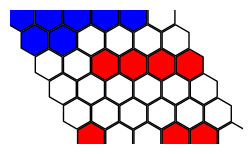

(0, 5)

In [ ]:
# Example usage to generate an endgame
game = HexGame(size=6)
search_tree = SearchTree(game, depth=1)

# Simulating a few moves until the game ends
game_over = False
for i in range(7):
    possible_moves = game.get_possible_moves()
    player_move = random.choice(possible_moves)
    game.make_move(*player_move)

    # Check if the game is over
    if game.state != 'U':
        game_over = True
        break

    # AI's move (Blue)
    best_move = search_tree.find_best_move()
    if best_move:
        game.make_move(*best_move)

    # Check if the game is over
    if game.state != 'U':
        game_over = True
        break

# Display the final game board
game.draw_board()

search =SearchTree(game, depth=3)
search.find_best_move()


In [ ]:
search.minimax(game , 2)

(0, (1, 2))

In [ ]:
class HexBoard:
    def __init__(self, size=6, board=None):
        # If no board is provided, initialize with an empty board
        if board is None:
            board = [['.' for _ in range(size)] for _ in range(size)]
        self.board = board
        self.size = size

    def display(self):
        # Display the hex board in a readable format
        for row in self.board:
            print(' '.join(row))

    def other(self, piece):
        # Return the opponent's piece (Red -> Blue, Blue -> Red)
        if piece == 'R':
            return 'B'
        return 'R'

    def is_valid_move(self, row, col):
        # A move is valid if the position is within bounds and the cell is empty
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def all_possible_moves(self, player_piece):
        possible_moves = []
        for row in range(self.size):
            for col in range(self.size):
                if self.is_valid_move(row, col):
                    new_board = [row.copy() for row in self.board]  # Copy the current board
                    new_board[row][col] = player_piece  # Make the move
                    possible_moves.append(HexBoard(self.size, new_board))  # Append the new board
        return possible_moves

    def state_of_board(self):
        # Check the state of the board (Winner, Draw, or Ongoing)
        if self.check_win('R'):
            return 'R'  # Red wins
        if self.check_win('B'):
            return 'B'  # Blue wins
        if not self.get_possible_moves():
            return 'D'  # Draw
        return 'U'  # Game still ongoing

    def check_win(self, player):
        # Check if the specified player has won
        def dfs(r, c):
            if player == 'R' and r == self.size - 1:  # Red wins by reaching the bottom row
                return True
            if player == 'B' and c == self.size - 1:  # Blue wins by reaching the rightmost column
                return True
            visited.add((r, c))
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player and (nr, nc) not in visited:
                    if dfs(nr, nc):
                        return True
            return False

        visited = set()
        for i in range(self.size):
            if player == 'R' and self.board[0][i] == 'R' and dfs(0, i):
                return True
            if player == 'B' and self.board[i][0] == 'B' and dfs(i, 0):
                return True
        return False


In [ ]:
class SearchTreeNode:
    def __init__(self, board_instance, playing_as):
        self.children = []
        self.current_board = board_instance
        self.move_for = playing_as
        self.generate_children()

    def generate_children(self):
        # Generate all possible children (next moves) from the current board state
        for next_move_board in self.current_board.all_possible_moves(self.move_for):
            self.children.append(SearchTreeNode(next_move_board, self.current_board.other(self.move_for)))

    def display_children(self):
        # Display all children (board states after a move)
        for i, child in enumerate(self.children):
            print(f"Child {i + 1}:")
            child.current_board.display()
            print()


In [ ]:
# Initialize the hex board (6x6)
board = HexBoard(size=6)

# Initialize the search tree with the starting board and Red playing first
search_tree = SearchTreeNode(board, 'R')



# Simulate a few moves (just for demonstration)
# Red moves to (0, 0)
board.board[0][0] = 'R'
search_tree = SearchTreeNode(board, 'B')  # Now it's Blue's turn

print("\nBoard after Red's move:")
board.display()
print("\nPossible moves for Blue:")
search_tree.display_children()

# Blue moves to (1, 1)
board.board[1][1] = 'B'
search_tree = SearchTreeNode(board, 'R')  # Now it's Red's turn

print("\nBoard after Blue's move:")
board.display()
print("\nPossible moves for Red:")
search_tree.display_children()


KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
class CurrentBoard:
    def __init__(self, size=6, board=None):
        if board is None:
            board = [['.' for _ in range(size)] for _ in range(size)]
        self.board = board
        self.size = size

    def display(self):
        for row in self.board:
            print(' '.join(row))

    def other(self, piece):
        return 'B' if piece == 'R' else 'R'

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def all_possible_moves(self, player_piece):
        possible_moves = []
        for row in range(self.size):
            for col in range(self.size):
                if self.is_valid_move(row, col):
                    new_board = [row.copy() for row in self.board]
                    new_board[row][col] = player_piece
                    possible_moves.append(CurrentBoard(self.size, new_board))
        return possible_moves

    def state_of_board(self):
        if self.check_win('R'):
            return 'R'  # Red wins
        if self.check_win('B'):
            return 'B'  # Blue wins
        if not self.all_possible_moves('R') and not self.all_possible_moves('B'):
            return 'D'  # Draw
        return 'U'  # Game still ongoing

    def check_win(self, player):
        def dfs(r, c):
            if player == 'R' and r == self.size - 1:
                return True
            if player == 'B' and c == self.size - 1:
                return True
            visited.add((r, c))
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]  # Include diagonal directions
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player and (nr, nc) not in visited:
                    if dfs(nr, nc):
                        return True
            return False

        visited = set()
        for i in range(self.size):
            if player == 'R' and self.board[0][i] == 'R' and dfs(0, i):
                return True
            if player == 'B' and self.board[i][0] == 'B' and dfs(i, 0):
                return True
        return False

    def minimax(self, depth, is_maximizing, alpha, beta, max_depth):
        state = self.state_of_board()
        if state == 'R':  # Red wins
            return -10
        elif state == 'B':  # Blue wins
            return 10
        elif state == 'D' or depth == max_depth:  # Draw or reached max depth
            return 0

        possible_moves = self.all_possible_moves('B' if is_maximizing else 'R')

        if is_maximizing:  # AI's turn (maximize score)
            max_eval = float('-inf')
            for move in possible_moves:
                eval = move.minimax(depth + 1, False, alpha, beta, max_depth)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:  # Prune branch
                    break
            return max_eval
        else:  # Player's turn (minimize score)
            min_eval = float('inf')
            for move in possible_moves:
                eval = move.minimax(depth + 1, True, alpha, beta, max_depth)
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:  # Prune branch
                    break
            return min_eval

    def best_move(self, max_depth=2):
        best_value = float('-inf')
        move = None
        possible_moves = self.all_possible_moves('B')  # AI (Blue) moves

        for new_board in possible_moves:
            board_value = new_board.minimax(0, False, float('-inf'), float('inf'), max_depth)
            if board_value > best_value:
                best_value = board_value
                move = new_board

        return move

In [ ]:
class SearchTreeNode:
    def __init__(self, board_instance, playing_as, depth=2):
        self.children = []
        self.current_board = board_instance
        self.move_for = playing_as
        self.depth = depth
        self.generate_children()

    def min_max_value(self, depth):
        # Return the score of the board using Min-Max algorithm
        if depth == 0 or self.current_board.state_of_board() != 'U':
            return self.evaluate_board()

        if self.move_for == 'R':
            max_eval = float('-inf')
            for child in self.children:
                eval = child.min_max_value(depth-1)
                max_eval = max(max_eval, eval)
            return max_eval
        else:  # Blue's turn (minimizing player)
            min_eval = float('inf')
            for child in self.children:
                eval = child.min_max_value(depth-1)
                min_eval = min(min_eval, eval)
            return min_eval

    def evaluate_board(self):
      state = self.current_board.state_of_board()

      if state == 'R':
          return 1  # Red wins
      elif state == 'B':
          return -1  # Blue wins
      elif state == 'D':
          return 0  # Draw

      # Additional logic to prioritize blocking moves
      score = 0
      # For Red (Player's) winning opportunities
      if self.current_board.check_win('R'):
          score -= 10  # Player's winning move
      # For Blue (AI) winning opportunities
      if self.current_board.check_win('B'):
          score += 10  # AI's winning move

      return score

    def generate_children(self):
        # Generate all possible children (next moves) from the current board state
        if self.depth <= 0:
            return  # Prevent further children generation if the depth is 0
        for next_move_board in self.current_board.all_possible_moves(self.move_for):
            self.children.append(SearchTreeNode(next_move_board, self.current_board.other(self.move_for), self.depth-1))

In [ ]:
def play_hex():
    board = CurrentBoard(size=6, board=None)

    while board.state_of_board() == 'U':
        board.display()
        print("\nPlayer (Red) - Choose a move:")

        # Player's Move
        row, col = map(int, input("Enter row and column (separated by space): ").split())
        if not board.is_valid_move(row, col):
            print("Invalid move! Try again.")
            continue
        board.board[row][col] = 'R'  # Player's move

        # Check if the player wins
        if board.state_of_board() != 'U':
            break

        # AI's Move
        print("\nAI (Blue) makes a move:")
        ai_move = board.best_move(max_depth=4)  # Limit the AI depth to 2 moves ahead
        board = ai_move  # Apply AI's best move

    board.display()
    result = board.state_of_board()

    if result == 'R':
        print("Player (Red) wins!")
    elif result == 'B':
        print("AI (Blue) wins!")
    else:
        print("It's a draw!")

In [ ]:
play_hex()

. . . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .

Player (Red) - Choose a move:
Enter row and column (separated by space): 0 0

AI (Blue) makes a move:
R B . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .

Player (Red) - Choose a move:
Enter row and column (separated by space): 0 1
Invalid move! Try again.
R B . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .

Player (Red) - Choose a move:
Enter row and column (separated by space): 1 0

AI (Blue) makes a move:
R B B . . .
R . . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .

Player (Red) - Choose a move:
Enter row and column (separated by space): 3 0

AI (Blue) makes a move:
R B B B . .
R . . . . .
. . . . . .
R . . . . .
. . . . . .
. . . . . .

Player (Red) - Choose a move:
Enter row and column (separated by space): 4 0

AI (Blue) makes a move:
R B B B B .
R . . . . .
. . . . . .
R . . . . .
R . . . . .
. . . . . .

Player (Red) - Choose a move:
Enter row and column (

In [ ]:
cb = CurrentBoard()
cb.best_move()

In [ ]:
cb.display()

. . . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .


In [ ]:
tree = SearchTreeNode(cb,"X")

In [ ]:
y =tree.children[0].children[1].current_board

y.display()

X . R . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .
. . . . . .


In [ ]:
tree.min_max_value(3)

inf

In [ ]:
class HexBoard:
    def __init__(self, size=11):
        self.size = size
        self.board = [[' ' for _ in range(size)] for _ in range(size)]
        self.state = self.state_of_board()

    def display(self, game_display=False):
        if game_display:
            for row in self.board:
                print(' '.join(row))
        else:
            for row in self.board:
                print(' '.join(row))

    def other(self, piece):
        return 'O' if piece == 'X' else 'X'

    def state_of_board(self):
        # Check if any player has won (using a DFS/BFS to check connectivity from one side to the other)
        for player in ['X', 'O']:
            if self.check_winner(player):
                return player
        if any(' ' in row for row in self.board):
            return "U"
        return "D"

    def check_winner(self, player):
        # DFS to check connectivity for player
        visited = [[False for _ in range(self.size)] for _ in range(self.size)]
        for row in range(self.size):
            for col in range(self.size):
                if self.board[row][col] == player and not visited[row][col]:
                    if self.dfs(row, col, visited, player):
                        return True
        return False

    def dfs(self, row, col, visited, player):
        if row < 0 or row >= self.size or col < 0 or col >= self.size:
            return False
        if visited[row][col] or self.board[row][col] != player:
            return False
        visited[row][col] = True
        if (player == 'X' and row == self.size - 1) or (player == 'O' and col == self.size - 1):
            return True
        # Check all adjacent cells
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
        for dr, dc in directions:
            if self.dfs(row + dr, col + dc, visited, player):
                return True
        return False

    def all_possible_moves(self, player_piece):
        possible_moves = []
        for row in range(self.size):
            for col in range(self.size):
                if self.board[row][col] == ' ':
                    new_board = [row.copy() for row in self.board]  # Copy the board
                    new_board[row][col] = player_piece
                    possible_moves.append(HexBoard(self.size))
                    possible_moves[-1].board = new_board
        return possible_moves


In [ ]:
class SearchTreeNode:
    def __init__(self, board_instance, playing_as, ply=2):
        self.children = []
        self.value_is_assigned = False
        self.ply_depth = ply
        self.current_board = board_instance
        self.move_for = playing_as
        if self.current_board.state == "U":
            self.generate_children()
        else:  # Game over
            if self.current_board.state == "D":
                self.value = 0  # Draw
            else:
                if (self.ply_depth % 2) == 0:
                    self.value = -1  # Loss
                else:
                    self.value = 1  # Win
            self.value_is_assigned = True

    def min_max_value(self):
        if self.value_is_assigned:
            return self.value

        self.children = sorted(self.children, key=lambda x: x.min_max_value())

        if (self.ply_depth % 2) == 0:  # Maximizing player (AI's turn)
            self.value = self.children[-1].value
        else:  # Minimizing player (opponent's turn)
            self.value = self.children[0].value
        self.value_is_assigned = True

        return self.value

    def generate_children(self):
        for board_for_next_move in self.current_board.all_possible_moves(self.move_for):
            self.children.append(SearchTreeNode(board_for_next_move, self.current_board.other(self.move_for), ply=self.ply_depth + 1))

    def evaluate(self):
        """
        Evaluate the board state for the current player (move_for) using a heuristic.
        Higher value is better for the current player.
        """

        if self.current_board.state == "D":  # Draw
            return 0
        elif self.current_board.state == "U":  # Game is not over
            connectedness_score = self.connectedness(self.move_for) - self.connectedness(self.current_board.other(self.move_for))
            path_length_score = self.path_length(self.move_for) - self.path_length(self.current_board.other(self.move_for))
            center_control_score = self.center_control(self.move_for)

            # Combine scores into an overall evaluation
            return connectedness_score + path_length_score + center_control_score
        else:  # Game over, either win or lose
            if (self.ply_depth % 2) == 0:  # Maximizing player (AI)
                return 1  # Win for the AI
            else:  # Minimizing player (opponent)
                return -1  # Loss for the AI

    def connectedness(self, player):
        """Measure how connected the player's pieces are to the target side of the board."""
        # Find all the paths from the player's side to the target side and evaluate them
        # This is a simple method; in practice, you would need a more complex pathfinding algorithm
        # like DFS or BFS to find the actual connected paths.

        score = 0
        for r in range(self.current_board.size):
            for c in range(self.current_board.size):
                if self.current_board.board[r][c] == player:
                    # Score is higher for pieces closer to the opponent's side
                    # You can implement a depth-first or breadth-first search here to find connected components.
                    score += 1
        return score

    def path_length(self, player):
        """Calculate the length of the shortest path from player's side to target side."""
        # Implement pathfinding here. This could use BFS or DFS to find the shortest path.
        return 0  # Placeholder, needs proper implementation

    def center_control(self, player):
        """Score for controlling the center of the board."""
        center_x, center_y = self.current_board.size // 2, self.current_board.size // 2
        score = 0

        # Consider positions near the center as more valuable
        for r in range(self.current_board.size):
            for c in range(self.current_board.size):
                if self.current_board.board[r][c] == player:
                    distance_to_center = abs(r - center_x) + abs(c - center_y)
                    score -= distance_to_center  # Closer to center is better, hence a negative penalty
        return score


In [ ]:
def play_Hex():
    response = input("Do you wish to play first (y/n)? ")
    players_turn = (response == "y")

    response = input("Do you wish to play Red (R) or Blue (B) (R/B)? ")
    size = int(input("Enter the board size (default 6x6): "))
    cb = HexBoard(size)
    player_is_playing = cb.other(response)

    for _ in range(2 * size * size):  # Max moves in a game
        if players_turn:
            cb.display(game_display=True)
            choice = input("Make your move (row,col): ")
            # Change this to split on both comma and space
            row, col = map(int, choice.replace(' ', ',').split(","))
            cb.board[row][col] = player_is_playing
            cb.display()
        else:
            print("\nAI (Blue) makes a move:")
            search_tree = SearchTreeNode(cb, cb.other(player_is_playing), ply=3)  # Use `ply` instead of `depth`
            search_tree.min_max_value()
            cb = search_tree.children[-1].current_board
            cb.display()

        if cb.state != "U":
            if cb.state == "D":
                print("It's a draw!")
            else:
                if players_turn:
                    print("You lost!")
                else:
                    print("You won!")
            cb.display()
            break

        players_turn = not players_turn


In [ ]:
play_Hex()

Do you wish to play first (y/n)? n
Do you wish to play Red (R) or Blue (B) (R/B)? R
Enter the board size (default 6x6): 5

AI (Blue) makes a move:


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-04d997f12e2c>", line 1, in <cell line: 0>
    play_Hex()
  File "<ipython-input-22-831a5d748bb9>", line 20, in play_Hex
    search_tree = SearchTreeNode(cb, cb.other(player_is_playing), ply=3)  # Use `ply` instead of `depth`
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-24-3d9f9bfcd37f>", line 9, in __init__
    self.generate_children()
  File "<ipython-input-24-3d9f9bfcd37f>", line 36, in generate_children
    self.children.append(SearchTreeNode(board_for_next_move, self.current_board.other(self.move_for), ply=self.ply_depth + 1))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-24-3d9f9bfcd37f>", line 9, in __init__
   

In [ ]:
cb = HexBoard()

cb.display()

In [ ]:
tree = SearchTreeNode(cb, 'B', ply=2)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-f8263f824e46>", line 1, in <cell line: 0>
    tree = SearchTreeNode(cb, 'B', ply=2)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-2-247935707d8b>", line 9, in __init__
    self.generate_children()
  File "<ipython-input-2-247935707d8b>", line 36, in generate_children
    self.children.append(SearchTreeNode(board_for_next_move, self.current_board.other(self.move_for), ply=self.ply_depth + 1))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-2-247935707d8b>", line 9, in __init__
    self.generate_children()
  File "<ipython-input-2-247935707d8b>", line 36, in generate_children
    self.children.append(SearchTreeNode(board_for_next_move, self.current_board

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-f8263f824e46>", line 1, in <cell line: 0>
    tree = SearchTreeNode(cb, 'B', ply=2)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-2-247935707d8b>", line 9, in __init__
    self.generate_children()
  File "<ipython-input-2-247935707d8b>", line 36, in generate_children
    self.children.append(SearchTreeNode(board_for_next_move, self.current_board.other(self.move_for), ply=self.ply_depth + 1))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-2-247935707d8b>", line 9, in __init__
    self.generate_children()
  File "<ipython-input-2-247935707d8b>", line 36, in generate_children
    self.children.append(SearchTreeNode(board_for_next_move, self.current_board

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-f8263f824e46>", line 1, in <cell line: 0>
    tree = SearchTreeNode(cb, 'B', ply=2)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-2-247935707d8b>", line 9, in __init__
    self.generate_children()
  File "<ipython-input-2-247935707d8b>", line 36, in generate_children
    self.children.append(SearchTreeNode(board_for_next_move, self.current_board.other(self.move_for), ply=self.ply_depth + 1))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-2-247935707d8b>", line 9, in __init__
    self.generate_children()
  File "<ipython-input-2-247935707d8b>", line 36, in generate_children
    self.children.append(SearchTreeNode(board_for_next_move, self.current_board

In [ ]:
y =tree.children[0].children[1].current_board

y.display()

AttributeError: 'SearchTreeNode' object has no attribute 'current_board'

In [ ]:
class CurrentBoard:
    def __init__(self, size=11):  # Default size is 11x11 Hex board
        self.size = size
        self.board = [[" " for _ in range(size)] for _ in range(size)]  # Initialize empty board
        self.state = self.state_of_board()

    def other(self, piece):
        if piece == "X":
            return "O"
        return "X"

    def display(self):
        for row in self.board:
            print(" ".join(row))

    def state_of_board(self):
        # Check if any player has won (player 1 has "X", player 2 has "O")
        if self.check_win("X"):
            return "X"  # Player 1 wins
        elif self.check_win("O"):
            return "O"  # Player 2 wins
        elif any(" " in row for row in self.board):
            return "U"  # Unfinished game
        return "D"  # Draw (if no empty spaces and no winner)

    def check_win(self, player):
        # This function checks for a path of the player's pieces connecting one side of the board to the other.
        # Specifically, for player "X", check for a path from top to bottom. For "O", check from left to right.
        visited = set()

        def dfs(r, c):
            if not (0 <= r < self.size and 0 <= c < self.size):
                return False
            if (r, c) in visited or self.board[r][c] != player:
                return False
            visited.add((r, c))
            # Check if we have reached the opposite side for "X" or "O"
            if (player == "X" and r == self.size - 1) or (player == "O" and c == self.size - 1):
                return True
            # Explore neighbors (hexagonal grid)
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1)]
            for dr, dc in directions:
                if dfs(r + dr, c + dc):
                    return True
            return False

        # Check from all starting positions on the top row (for "X") or left column (for "O")
        for i in range(self.size):
            if player == "X" and self.board[0][i] == "X" and dfs(0, i):
                return True
            if player == "O" and self.board[i][0] == "O" and dfs(i, 0):
                return True
        return False

    def all_possible_moves(self, player_piece):
        possible_moves = []
        for row in range(self.size):
            for col in range(self.size):
                if self.board[row][col] == " ":
                    # Create a new board with the player's piece placed at the current position
                    new_board = [row.copy() for row in self.board]  # Deep copy of the board
                    new_board[row][col] = player_piece
                    possible_moves.append(CurrentBoard(self.size))
                    possible_moves[-1].board = new_board
        return possible_moves


In [ ]:
class SearchTreeNode:
    def __init__(self, board_instance, playing_as, ply=0):
        self.children = []
        self.value_is_assigned = False
        self.ply_depth = ply
        self.current_board = board_instance
        self.move_for = playing_as
        if self.current_board.state == "U":
            self.generate_children()
        else:  # Game over
            if self.current_board.state == "D":
                self.value = 0  # Draw
            elif self.current_board.state == "X":
                self.value = 1  # Player 1 wins
            else:
                self.value = -1  # Player 2 wins
            self.value_is_assigned = True

    def min_max_value(self):
        if self.value_is_assigned:
            return self.value

        self.children = sorted(self.children, key=lambda x: x.min_max_value())

        if self.ply_depth % 2 == 0:
            # AI's turn (maximizing)
            self.value = self.children[-1].value
        else:
            # Player's turn (minimizing)
            self.value = self.children[0].value
        self.value_is_assigned = True

        return self.value

    def generate_children(self):
        for board_for_next_move in self.current_board.all_possible_moves(self.move_for):
            child_node = SearchTreeNode(board_for_next_move, self.current_board.other(self.move_for), ply=self.ply_depth + 1)
            self.children.append(child_node)

    def print_children(self):
        print(f"Generating children for board (depth {self.ply_depth})")
        for idx, child in enumerate(self.children):
            print(f"Child {idx + 1}:")
            child.current_board.display()
            print()


In [ ]:
def play_Hex():
    response = input("Do you wish to play first (y/n)? ")
    players_turn = (response == "y")

    response = input("Do you wish to play X or O (X/O)? ")
    cb = CurrentBoard()
    player_is_playing = cb.other(cb.other(response))  # Set the player's opponent piece

    for _ in range(100):  # Max 100 turns, because Hex games can go for a while
        if players_turn:
            cb.display()
            print(f"Your turn ({player_is_playing}):")
            row, col = map(int, input("Enter row and column (separated by space): ").split())
            if cb.board[row][col] == " ":
                cb.board[row][col] = player_is_playing
            else:
                print("Invalid move! Try again.")
                continue
        else:
            # AI's turn (using minimax)
            search_tree = SearchTreeNode(cb, cb.other(player_is_playing))
            search_tree.min_max_value()
            cb = search_tree.children[-1].current_board
            print("AI's turn:")

        if cb.state != "U":
            cb.display()
            if cb.state == "D":
                print("It's a draw!")
            elif cb.state == "X":
                print("Player 1 (X) wins!")
            else:
                print("Player 2 (O) wins!")
            break

        players_turn = not players_turn


In [ ]:
cb = CurrentBoard(6)

In [ ]:
def test_possible_moves():
    cb = CurrentBoard(6)  # Empty board
    moves = cb.all_possible_moves("X")
    print(f"Possible moves: {len(moves)}")
    for move in moves:
        print(move.board)

test_possible_moves()


Possible moves: 36
[['X', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ']]
[[' ', 'X', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ']]
[[' ', ' ', 'X', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ']]
[[' ', ' ', ' ', 'X', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ']]
[[' ', ' ', ' ', ' ', 'X', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ']]
[[' ', ' ', ' ',

In [ ]:
def test_children_generation():
    # Initialize the board
    cb = CurrentBoard(size=5)  # Use a 5x5 Hex board for simplicity

    # Let's manually place a piece to simulate a state in the game
    cb.board[2][2] = "X"  # Player 1's move at (2, 2)

    # Create a search tree node for this board state
    search_tree = SearchTreeNode(cb, "O")  # Player "O" (AI) will generate its possible moves

    # Now print the children generated from this node
    search_tree.print_children()

test_children_generation()


KeyboardInterrupt: 

In [ ]:
class CurrentBoard:
    def __init__(self, size=5):
        self.size = size
        self.board = [[" " for _ in range(size)] for _ in range(size)]

    def print_board(self):
        for row in self.board:
            print(" | ".join(row))
            print("-" * (self.size * 4 - 1))

    def is_full(self):
        return all(cell != " " for row in self.board for cell in row)

    def is_winner(self, player):
        # Check rows, columns, and diagonals
        for i in range(self.size):
            if all(self.board[i][j] == player for j in range(self.size)):
                return True
            if all(self.board[j][i] == player for j in range(self.size)):
                return True

        if all(self.board[i][i] == player for i in range(self.size)):
            return True
        if all(self.board[i][self.size - 1 - i] == player for i in range(self.size)):
            return True

        return False

    def all_possible_moves(self, player):
        moves = []
        for i in range(self.size):
            for j in range(self.size):
                if self.board[i][j] == " ":
                    new_board = CurrentBoard(self.size)
                    new_board.board = [row.copy() for row in self.board]
                    new_board.board[i][j] = player
                    moves.append(new_board)
        return moves

    def other(self, player):
        return "O" if player == "X" else "X"


In [ ]:
class SearchTreeNode:
    def __init__(self, current_board, move_for, ply_depth=0):
        self.current_board = current_board
        self.move_for = move_for
        self.ply_depth = ply_depth
        self.children = []

    def generate_children(self):
        for board_for_next_move in self.current_board.all_possible_moves(self.move_for):
            self.children.append(SearchTreeNode(board_for_next_move, self.current_board.other(self.move_for), ply=self.ply_depth + 1))

    def print_children(self):
        print(f"Children of board (move for: {self.move_for}):")
        for child in self.children:
            child.current_board.print_board()
            print(f"------ Depth: {child.ply_depth} ------")


In [ ]:
class CurrentBoard:
    def __init__(self, string_def=" "*36):
        # Initialize a 6x6 Hex board (36 spots)
        self.board = string_def
        self.state = self.state_of_board()

    def display(self, game_display=False):
        """ Display the board. """
        c = self.board

        # Display the board, adjust layout for hex format
        for i in range(6):
            line = " ".join(c[i*6:(i+1)*6])
            print(line)

    def other(self, piece):
        """ Return the opposing piece. """
        if piece == "X":
            return "O"
        return "X"

    def connected(self, i1, i2, i3, i4, i5, i6):
        """ Check if pieces at the given indexes are the same and not empty. """
        return self.board[i1] == self.board[i2] == self.board[i3] == self.board[i4] == self.board[i5] == self.board[i6] != " "

    def state_of_board(self):
        """ Evaluate the state of the board: check for winners, draw, or game still in progress. """
        # Checking for win conditions (top-to-bottom or left-to-right)
        # You would need to implement a function to check for path connections in the game of Hex
        for i in range(6):
            # Check if any player has connected from one side to another
            if self.connected(i, i+6, i+12, i+18, i+24, i+30):
                return self.board[i]  # Winner found

        # Check for draw or unfinished game
        if " " in self.board:
            return "U"  # Unfinished game
        return "D"  # Draw

    def all_possible_moves(self, player_piece):
        """ Generate all possible moves for the player (placing piece in an empty spot). """
        possible_moves = []
        for index in range(len(self.board)):
            if self.board[index] == " ":
                # Create a new board with the player piece in the empty spot
                new_board = self.board[:index] + player_piece + self.board[index+1:]
                possible_moves.append(CurrentBoard(new_board))
        return possible_moves

# Example usage:
cb = CurrentBoard()
cb.display()  # Display the current board


In [ ]:
class SearchTreeNode:

    def __init__(self, board_instance, playing_as, ply=0):
        self.children = []
        self.value_is_assigned = False
        self.ply_depth = ply
        self.current_board = board_instance
        self.move_for = playing_as

        # Check the current game state
        if self.current_board.state == "U":  # Unfinished game
            self.generate_children()
        else:   # Game over
            if self.current_board.state == "D":  # Draw
                self.value = 0
            else:  # Win
                if (self.ply_depth % 2) == 0:  # Computer's turn (maximizing)
                    self.value = -1
                else:  # Player's turn (minimizing)
                    self.value = 1
            self.value_is_assigned = True

    def min_max_value(self, alpha=-float('inf'), beta=float('inf')):
          if self.value_is_assigned:
              return self.value

          self.children = sorted(self.children, key=lambda x: x.min_max_value())

          if self.ply_depth % 2 == 0:
              # Computer's move (maximizing)
              max_val = -float('inf')
              for child in self.children:
                  max_val = max(max_val, child.min_max_value(alpha, beta))
                  alpha = max(alpha, max_val)
                  if beta <= alpha:
                      break  # Beta cut-off
              self.value = max_val
          else:
              # Player's move (minimizing)
              min_val = float('inf')
              for child in self.children:
                  min_val = min(min_val, child.min_max_value(alpha, beta))
                  beta = min(beta, min_val)
                  if beta <= alpha:
                      break  # Alpha cut-off
              self.value = min_val

          self.value_is_assigned = True
          return self.value


    def generate_children(self):
        """ Generate all possible children for the current game state. """
        for board_for_next_move in self.current_board.all_possible_moves(self.move_for):
            # Create child nodes for each possible move
            self.children.append(SearchTreeNode(board_for_next_move, self.current_board.other(self.move_for), ply=self.ply_depth + 1))


In [ ]:
def play_Hex():
    # Ask the player if they want to play first
    response = input("Do you wish to play first (y/n)? ")
    players_turn = (response == "y")

    # Ask the player whether they want to play "X" or "O"
    response = input("Do you wish to play X or O (X/O)? ")
    cb = CurrentBoard(" " * 36)  # Create a 6x6 Hex board (36 positions)
    player_is_playing = cb.other(cb.other(response))  # Set the opponent's piece

    for _ in range(36):  # Maximum number of moves for a 6x6 board

        if players_turn:
            cb.display(game_display=True)  # Display the board
            choice = input("Make your move (choose an index from 0 to 35): ")  # 6x6 grid = 36 cells
            ind = int(choice)

            # Make the move
            cb = CurrentBoard(cb.board[:ind] + player_is_playing + cb.board[ind+1:])
            cb.display()

        else:
            # Minimax decision for the computer's move
            search_tree = SearchTreeNode(cb, cb.other(player_is_playing))
            search_tree.min_max_value()
            cb = search_tree.children[-1].current_board  # Best move for the computer
            print(f"Computer plays at position {search_tree.children[-1].current_board.board.index(player_is_playing)}")

        # Check for game over condition
        if cb.state != "U":
            if cb.state == "D":  # Draw
                print("I can't believe it, you drew!!")
            else:  # Win
                if players_turn:
                    print("This is impossible!!!!")
                else:
                    print("Too easy, loser!!!")
                    cb.display()  # Show final board
            break

        # Alternate turns
        players_turn = not players_turn


In [ ]:
play_Hex()

Do you wish to play first (y/n)? y
Do you wish to play X or O (X/O)? X
           
           
           
           
           
           
Make your move (choose an index from 0 to 35): 0
X          
           
           
           
           
           


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

class HexGame:
    def __init__(self, size=6):
        self.size = size
        self.board = [['.' for _ in range(size)] for _ in range(size)]
        self.current_player = 'R'  # Red starts

    def draw_board(self):
        fig, ax = plt.subplots(figsize=(self.size/2, self.size/2))
        ax.set_aspect('equal')
        dx = np.sqrt(3)
        dy = 1.5
        x_coords = []
        y_coords = []
        colors = []

        for row in range(self.size):
            for col in range(self.size):
                x = col * dx + (row * dx / 2)
                y = -row * dy
                x_coords.append(x)
                y_coords.append(y)
                colors.append(self.get_color(self.board[row][col]))

        ax.scatter(x_coords, y_coords, s=500, marker='h', edgecolors='black', c=colors)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)
        plt.show()

    def get_color(self, cell):
        if cell == 'R':
            return 'red'
        elif cell == 'B':
            return 'blue'
        return 'white'

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def make_move(self, row, col):
        if self.is_valid_move(row, col):
            self.board[row][col] = self.current_player
            self.current_player = 'B' if self.current_player == 'R' else 'R'
            return True
        return False

    def get_possible_moves(self):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.board[r][c] == '.']

    def minimax(self, depth, maximizing, alpha=-float('inf'), beta=float('inf')):
        if depth == 0 or self.check_win('R') or self.check_win('B'):
            return self.evaluate(), None

        best_move = None
        if maximizing:  # AI's turn (playing as 'B')
            max_eval = float('-inf')
            for move in self.get_possible_moves():
                self.make_move(*move)
                eval_score, _ = self.minimax(depth - 1, False, alpha, beta)
                self.undo_move(*move)
                if eval_score > max_eval:
                    max_eval = eval_score
                    best_move = move
                alpha = max(alpha, eval_score)
                if beta <= alpha:
                    break
            return max_eval, best_move
        else:  # Player's turn (playing as 'R')
            min_eval = float('inf')
            for move in self.get_possible_moves():
                self.make_move(*move)
                eval_score, _ = self.minimax(depth - 1, True, alpha, beta)
                self.undo_move(*move)
                if eval_score < min_eval:
                    min_eval = eval_score
                    best_move = move
                beta = min(beta, eval_score)
                if beta <= alpha:
                    break
            return min_eval, best_move

    def evaluate(self):
        # Evaluation that considers blocking the opponent and winning for the AI
        red_count = sum(row.count('R') for row in self.board)
        blue_count = sum(row.count('B') for row in self.board)
        score = blue_count - red_count  # Basic score: positive means AI is doing better

        # Look for situations where the opponent might be one move away from winning
        if self.check_win('R'):
            score -= 1000  # Penalize if the player wins
        if self.check_win('B'):
            score += 1000  # Reward if AI wins

        return score

    def ai_move(self):
        _, best_move = self.minimax(2, True)  # Limiting depth to 2 for AI
        if best_move:
            self.make_move(*best_move)

    def check_win(self, player):
        visited = set()
        def dfs(r, c):
            if (r, c) in visited:
                return False
            if player == 'R' and r == self.size - 1:
                return True
            if player == 'B' and c == self.size - 1:
                return True
            visited.add((r, c))
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player:
                    if dfs(nr, nc):
                        return True
            return False

        for i in range(self.size):
            if player == 'R' and self.board[0][i] == 'R' and dfs(0, i):
                return True
            if player == 'B' and self.board[i][0] == 'B' and dfs(i, 0):
                return True
        return False

    def undo_move(self, row, col):
        self.board[row][col] = '.'

    @staticmethod
    def play_game():
        game = HexGame(size=6)
        while True:
            game.draw_board()
            row, col = map(int, input("Enter row and col (e.g., 0 1): ").split())
            if not game.make_move(row, col):
                print("Invalid move! Try again.")
                continue

            if game.check_win('R'):
                game.draw_board()
                print("Red wins!")
                break

            print("AI is thinking...")
            game.ai_move()

            if game.check_win('B'):
                game.draw_board()
                print("Blue wins!")
                break
            elif not game.get_possible_moves():
                game.draw_board()
                print("It's a draw!")
                break
        return game


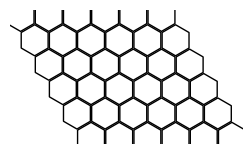

Enter row and col (e.g., 0 1): 0 0
AI is thinking...


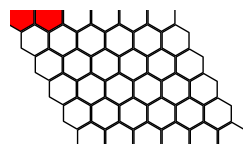

Enter row and col (e.g., 0 1): 2 2
AI is thinking...


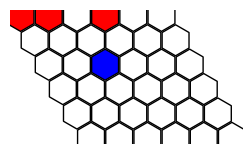

Enter row and col (e.g., 0 1): 2 3
AI is thinking...


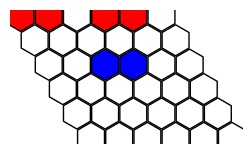

Enter row and col (e.g., 0 1): 5 2
AI is thinking...


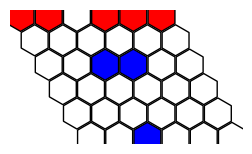

Enter row and col (e.g., 0 1): 0 2
AI is thinking...


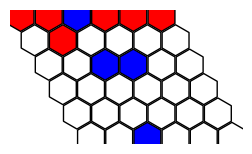

Enter row and col (e.g., 0 1): 1 2
AI is thinking...


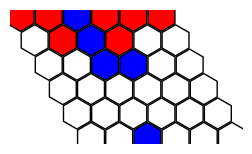

Enter row and col (e.g., 0 1): 3 2
AI is thinking...


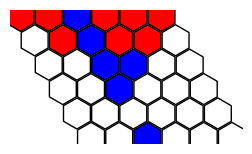

Enter row and col (e.g., 0 1): 20.


ValueError: invalid literal for int() with base 10: '20.'

In [ ]:
HexGame.play_game()

In [ ]:
import pygame
import numpy as np
import random
import copy

# Constants
HEX_RADIUS = 40
HEX_SPACING = 5
BOARD_SIZE = 6
WIDTH = 800
HEIGHT = 700

def hex_to_pixel(row, col):
    dx = HEX_RADIUS * 1.5
    dy = HEX_RADIUS * np.sqrt(3)
    x = col * dx + row * (dx / 2) + 100
    y = row * dy + 100
    return x, y

class HexGame:
    def __init__(self, size=BOARD_SIZE):
        self.size = size
        self.board = [['.' for _ in range(size)] for _ in range(size)]
        self.current_player = 'R'  # Red starts

    def draw_board(self, screen):
        for row in range(self.size):
            for col in range(self.size):
                x, y = hex_to_pixel(row, col)
                color = self.get_color(self.board[row][col])
                pygame.draw.polygon(screen, color, self.get_hex_corners(x, y))
                pygame.draw.polygon(screen, (0, 0, 0), self.get_hex_corners(x, y), 2)

    def get_color(self, cell):
        if cell == 'R':
            return (255, 0, 0)  # Red
        elif cell == 'B':
            return (0, 0, 255)  # Blue
        return (200, 200, 200)  # Grey

    def get_hex_corners(self, x, y):
        corners = []
        for i in range(6):
            angle = np.pi / 3 * i
            corners.append((x + HEX_RADIUS * np.cos(angle), y + HEX_RADIUS * np.sin(angle)))
        return corners

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def make_move(self, row, col):
        if self.is_valid_move(row, col):
            self.board[row][col] = self.current_player
            self.current_player = 'B' if self.current_player == 'R' else 'R'
            return True
        return False

    def get_possible_moves(self):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.board[r][c] == '.']

    def minimax(self, depth, maximizing):
        if depth == 0 or self.check_win('R') or self.check_win('B'):
            return self.evaluate(), None

        best_move = None
        if maximizing:
            max_eval = float('-inf')
            for move in self.get_possible_moves():
                new_board = copy.deepcopy(self)
                new_board.make_move(*move)
                eval_score, _ = new_board.minimax(depth - 1, False)
                if eval_score > max_eval:
                    max_eval = eval_score
                    best_move = move
            return max_eval, best_move
        else:
            min_eval = float('inf')
            for move in self.get_possible_moves():
                new_board = copy.deepcopy(self)
                new_board.make_move(*move)
                eval_score, _ = new_board.minimax(depth - 1, True)
                if eval_score < min_eval:
                    min_eval = eval_score
                    best_move = move
            return min_eval, best_move

    def evaluate(self):
        return random.randint(-10, 10)

    def ai_move(self):
        _, best_move = self.minimax(2, True)
        if best_move:
            self.make_move(*best_move)

    def check_win(self, player):
        visited = set()
        def dfs(r, c):
            if (r, c) in visited:
                return False
            if player == 'R' and r == self.size - 1:
                return True
            if player == 'B' and c == self.size - 1:
                return True
            visited.add((r, c))
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player:
                    if dfs(nr, nc):
                        return True
            return False

        for i in range(self.size):
            if player == 'R' and self.board[0][i] == 'R' and dfs(0, i):
                return True
            if player == 'B' and self.board[i][0] == 'B' and dfs(i, 0):
                return True
        return False

def get_clicked_hex(pos):
    x, y = pos
    for row in range(BOARD_SIZE):
        for col in range(BOARD_SIZE):
            hx, hy = hex_to_pixel(row, col)
            if np.linalg.norm(np.array([x, y]) - np.array([hx, hy])) < HEX_RADIUS:
                return row, col
    return None

def main():
    pygame.init()
    screen = pygame.display.set_mode((WIDTH, HEIGHT))
    pygame.display.set_caption("Hex Game")
    clock = pygame.time.Clock()

    game = HexGame(size=BOARD_SIZE)
    running = True

    while running:
        screen.fill((255, 255, 255))
        game.draw_board(screen)
        pygame.display.flip()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.MOUSEBUTTONDOWN:
                pos = pygame.mouse.get_pos()
                hex_clicked = get_clicked_hex(pos)
                if hex_clicked and game.make_move(*hex_clicked):
                    if game.check_win('R'):
                        print("Red wins!")
                        running = False
                    elif game.check_win('B'):
                        print("Blue wins!")
                        running = False
                    else:
                        print("AI is thinking...")
                        game.ai_move()
                        if game.check_win('B'):
                            print("Blue wins!")
                            running = False
    pygame.quit()

if __name__ == "__main__":
    main()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

In [ ]:
hexgame()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import random

class HexGame:
    def __init__(self, size=6):
        self.size = size
        self.board = [['.' for _ in range(size)] for _ in range(size)]
        self.current_player = 'R'  # Red starts
        self.initialize_board()

    def initialize_board(self):
        initial_moves = [
            (0,1,'B'), (1,0,'R'), (1,2,'B'), (2,1,'R'), (2,3,'B'),
            (3,2,'R'), (3,4,'B'), (4,3,'R'), (4,5,'B'), (5,4,'R'),
            (0,3,'B'), (1,4,'R'), (2,5,'B'), (3,0,'R'), (4,1,'B'),
            (5,2,'R'), (0,5,'B'), (1,1,'R'), (2,0,'B'), (3,5,'R'),
            (4,0,'B'), (5,1,'R'), (0,2,'B'), (1,3,'R'), (2,4,'B'),
            (3,1,'R'), (4,2,'B')
        ]
        for row, col, player in initial_moves:
            self.board[row][col] = player

    def draw_board(self):
        fig, ax = plt.subplots(figsize=(self.size/2, self.size/2))
        ax.set_aspect('equal')
        dx = np.sqrt(3)
        dy = 1.5
        x_coords = []
        y_coords = []
        colors = []

        for row in range(self.size):
            for col in range(self.size):
                x = col * dx + (row * dx / 2)
                y = -row * dy
                x_coords.append(x)
                y_coords.append(y)
                colors.append(self.get_color(self.board[row][col]))

        ax.scatter(x_coords, y_coords, s=500, marker='h', edgecolors='black', c=colors)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)
        plt.show()

    def get_color(self, cell):
        if cell == 'R':
            return 'red'
        elif cell == 'B':
            return 'blue'
        return 'white'

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def make_move(self, row, col):
        if self.is_valid_move(row, col):
            self.board[row][col] = self.current_player
            self.current_player = 'B' if self.current_player == 'R' else 'R'
            return True
        return False

    def get_possible_moves(self):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.board[r][c] == '.']

    def check_win(self, player):
        visited = set()
        def dfs(r, c):
            if (r, c) in visited:
                return False
            if player == 'R' and r == self.size - 1:
                return True
            if player == 'B' and c == self.size - 1:
                return True
            visited.add((r, c))
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player:
                    if dfs(nr, nc):
                        return True
            return False

        for i in range(self.size):
            if player == 'R' and self.board[0][i] == 'R' and dfs(0, i):
                return True
            if player == 'B' and self.board[i][0] == 'B' and dfs(i, 0):
                return True
        return False

    @staticmethod
    def play_game():
        game = HexGame(size=6)
        while True:
            game.draw_board()
            row, col = map(int, input("Enter row and col (e.g., 0 1): ").split())
            if not game.make_move(row, col):
                print("Invalid move! Try again.")
                continue

            if game.check_win('R'):
                game.draw_board()
                print("Red wins!")
                break

            if game.check_win('B'):
                game.draw_board()
                print("Blue wins!")
                break
            elif not game.get_possible_moves():
                game.draw_board()
                print("It's a draw!")
                break
        return game


In [ ]:
hex = HexGame()

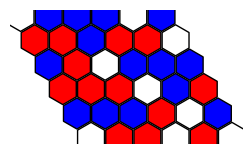

In [ ]:
hex.draw_board()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import random

class CurrentBoard:
    def __init__(self, size=6):
        self.size = size
        self.board = [['.' for _ in range(size)] for _ in range(size)]
        self.initialize_board()

    def initialize_board(self):
        predefined_moves = [
            (0, 1, 'B'), (1, 0, 'R'), (1, 2, 'B'), (2, 1, 'R'), (2, 3, 'B'),
            (3, 2, 'R'), (3, 4, 'B'), (4, 3, 'R'), (4, 5, 'B'), (5, 4, 'R'),
            (0, 3, 'B'), (1, 4, 'R'), (2, 5, 'B'), (3, 0, 'R'), (4, 1, 'B'),
            (5, 2, 'R'), (0, 5, 'B'), (1, 1, 'R'), (2, 0, 'B'), (3, 5, 'R'),
            (4, 0, 'B'), (5, 1, 'R'), (0, 2, 'B'), (1, 3, 'R'), (2, 4, 'B'),
            (3, 1, 'R'), (4, 2, 'B')
        ]
        for row, col, player in predefined_moves:
            self.board[row][col] = player

    def draw_board(self):
        fig, ax = plt.subplots(figsize=(self.size/2, self.size/2))
        ax.set_aspect('equal')
        dx = np.sqrt(3)
        dy = 1.5
        x_coords, y_coords, colors = [], [], []

        for row in range(self.size):
            for col in range(self.size):
                x = col * dx + (row * dx / 2)
                y = -row * dy
                x_coords.append(x)
                y_coords.append(y)
                colors.append(self.get_color(self.board[row][col]))

        ax.scatter(x_coords, y_coords, s=500, marker='h', edgecolors='black', c=colors)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)

        plt.show(block=False)  # Ensure it does not block execution
        plt.pause(0.1)  # Allow time for display update

    def get_color(self, cell):
        if cell == 'R':
            return 'red'
        elif cell == 'B':
            return 'blue'
        return 'white'

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def make_move(self, row, col, player):
        if self.is_valid_move(row, col):
            self.board[row][col] = player
            return True
        return False

    def get_possible_moves(self):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.board[r][c] == '.']

    def check_win(self, player):
        visited = set()

        def dfs(row, col):
            if (row, col) in visited:
                return False
            visited.add((row, col))

            # Check if a Red player reached the last row or a Blue player reached the last column
            if (player == 'R' and row == self.size - 1) or (player == 'B' and col == self.size - 1):
                return True

            # Possible hexagonal neighbors
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = row + dr, col + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player:
                    if dfs(nr, nc):
                        return True
            return False

        # Check all starting positions
        if player == 'R':
            for col in range(self.size):  # Start from the top row
                if self.board[0][col] == 'R' and dfs(0, col):
                    return True
        else:  # player == 'B'
            for row in range(self.size):  # Start from the leftmost column
                if self.board[row][0] == 'B' and dfs(row, 0):
                    return True

        return False


In [ ]:
class SearchTreeNode:
    def __init__(self, board_instance, playing_as, ply=0):
        self.children = []
        self.value_is_assigned = False
        self.ply_depth = ply
        self.current_board = copy.deepcopy(board_instance)
        self.move_for = playing_as
        self.value = None

        if self.current_board.check_win('R') or self.current_board.check_win('B'):
            self.value = 1 if playing_as == 'R' else -1
            self.value_is_assigned = True
        else:
            self.generate_children()

    def min_max_value(self):
        if self.value_is_assigned:
            return self.value

        self.children.sort(key=lambda x: x.min_max_value())

        if (self.ply_depth % 2) == 0:  # Computer's move
            self.value = self.children[-1].value
        else:  # Player's move
            self.value = self.children[0].value

        self.value_is_assigned = True
        return self.value

    def generate_children(self):
        for move in self.current_board.get_possible_moves():
            new_board = copy.deepcopy(self.current_board)
            new_board.make_move(*move, self.move_for)
            self.children.append(SearchTreeNode(new_board, self.other_player(self.move_for), ply=self.ply_depth + 1))

    @staticmethod
    def other_player(player):
        return 'B' if player == 'R' else 'R'

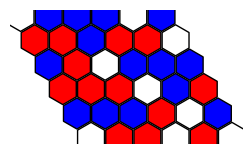

Enter row and col (e.g., 0 1): 0 0
AI is thinking...


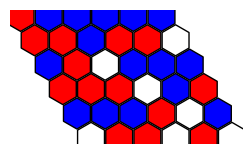

Enter row and col (e.g., 0 1): 0 5
Invalid move! Try again.


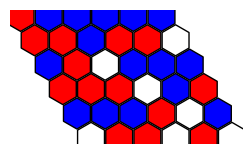

Enter row and col (e.g., 0 1): 5 0
AI is thinking...


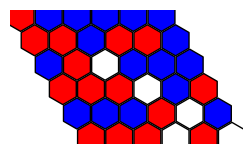

Enter row and col (e.g., 0 1): 5 3
AI is thinking...


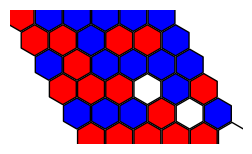

Enter row and col (e.g., 0 1): 4 3
Invalid move! Try again.


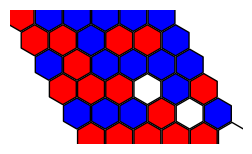

Enter row and col (e.g., 0 1): 3 3
AI is thinking...


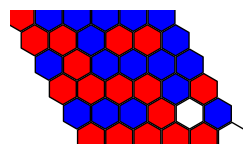

Player R wins!


In [ ]:
class play_Hex:
    @staticmethod
    def play_game():
        board = CurrentBoard(size=6)
        player = 'R'
        while True:
            board.draw_board()
            row, col = map(int, input("Enter row and col (e.g., 0 1): ").split())
            if not board.make_move(row, col, player):
                print("Invalid move! Try again.")
                continue

            print("AI is thinking...")
            tree = SearchTreeNode(board, SearchTreeNode.other_player(player))
            tree.generate_children()
            best_move = random.choice(tree.children).board.get_possible_moves()[0] if tree.children else None

            if board.check_win(player):
              board.draw_board()
              print(f"Player {player} wins!")
              break

            if best_move:
                board.make_move(*best_move, SearchTreeNode.other_player(player))

                if board.check_win(SearchTreeNode.other_player(player)):
                    board.draw_board()
                    print(f"AI ({SearchTreeNode.other_player(player)}) wins!")
                    break
            else:
                print("It's a draw!")
                break


play_Hex.play_game()


In [ ]:
cb = CurrentBoard()

In [ ]:
tree = SearchTreeNode(cb,"X")

KeyboardInterrupt: 

In [ ]:
tree.children[0].children[0].current_board.display()

AttributeError: 'CurrentBoard' object has no attribute 'display'

In [ ]:
tree.min_max_value()

AttributeError: 'SearchTreeNode' object has no attribute 'min_max_value'